In [142]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [143]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [144]:
yf.pdr_override()
df = pdr.get_data_yahoo("ZC=F", start="2016-01-01", end="2023-03-29")
#df = pd.DataFrame(data = df, columns=['Open','High', 'Low','Close','Adj Close','Volume'])
if isinstance(df, pd.DataFrame):
    df.head()

[*********************100%***********************]  1 of 1 completed


In [145]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,359.50,360.00,350.50,351.50,351.50,188747
2016-01-05,352.75,356.00,351.75,353.00,353.00,147255
2016-01-06,353.50,354.75,350.25,353.25,353.25,138855
2016-01-07,353.25,354.25,348.50,353.00,353.00,151656
2016-01-08,353.00,357.75,352.75,357.00,357.00,178645


In [146]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-22,631.25,636.00,623.25,633.50,633.50,154747
2023-03-23,633.00,644.00,627.25,631.75,631.75,186439
2023-03-24,631.00,645.00,627.50,643.00,643.00,191256
2023-03-27,643.00,648.75,637.00,648.25,648.25,145573
2023-03-28,646.75,651.25,644.50,647.25,647.25,145573


In [147]:
df.shape

(1817, 6)

In [148]:
df1=df.reset_index()['High']

In [149]:
df1

0       360.00
1       356.00
2       354.75
3       354.25
4       357.75
         ...  
1812    636.00
1813    644.00
1814    645.00
1815    648.75
1816    651.25
Name: High, Length: 1817, dtype: float64

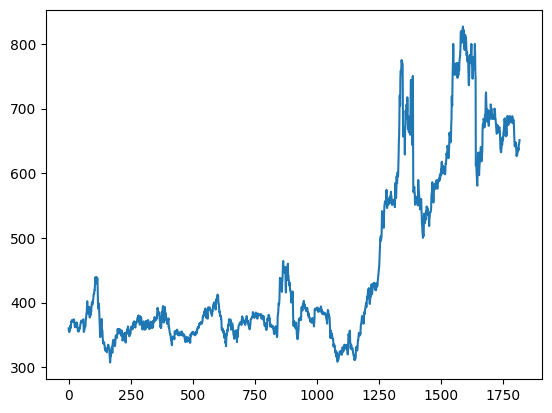

In [150]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [151]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [152]:
import numpy as np

In [153]:
df1

0       360.00
1       356.00
2       354.75
3       354.25
4       357.75
         ...  
1812    636.00
1813    644.00
1814    645.00
1815    648.75
1816    651.25
Name: High, Length: 1817, dtype: float64

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [155]:
df1

array([[0.1014911 ],
       [0.09379509],
       [0.09139009],
       ...,
       [0.64983165],
       [0.65704666],
       [0.66185666]])

In [156]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [157]:
training_size,test_size

(1181, 636)

In [158]:
train_data

array([[0.1014911 ],
       [0.09379509],
       [0.09139009],
       ...,
       [0.11447811],
       [0.11976912],
       [0.12457912]])

In [159]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [160]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [161]:
print(X_train.shape), print(y_train.shape)

(1080, 100)
(1080,)


(None, None)

In [162]:
print(X_test.shape), print(ytest.shape)

(535, 100)
(535,)


(None, None)

In [163]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [164]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [165]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [166]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [167]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 15s 417ms/step - loss: 0.0042 - val_loss: 0.1777
Epoch 2/100
17/17 [==============================] - 4s 249ms/step - loss: 0.0013 - val_loss: 0.0617
Epoch 3/100
17/17 [==============================] - 3s 196ms/step - loss: 7.6102e-04 - val_loss: 0.0060
Epoch 4/100
17/17 [==============================] - 4s 244ms/step - loss: 5.8237e-04 - val_loss: 0.0170
Epoch 5/100
17/17 [==============================] - 4s 253ms/step - loss: 5.0060e-04 - val_loss: 0.0060
Epoch 6/100
17/17 [==============================] - 4s 261ms/step - loss: 4.4690e-04 - val_loss: 0.0126
Epoch 7/100
17/17 [==============================] - 3s 196ms/step - loss: 4.3404e-04 - val_loss: 0.0054
Epoch 8/100
17/17 [==============================] - 4s 261ms/step - loss: 4.1605e-04 - val_loss: 0.0100
Epoch 9/100
17/17 [==============================] - 5s 306ms/step - loss: 3.8718e-04 - val_loss: 0.0055
Epoch 10/100
17/17 [==============================] - 4s 254ms

In [169]:
import tensorflow as tf

In [170]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 2s 109ms/step


In [171]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [172]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

366.99013428170434

In [173]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

629.8282343824119

In [174]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

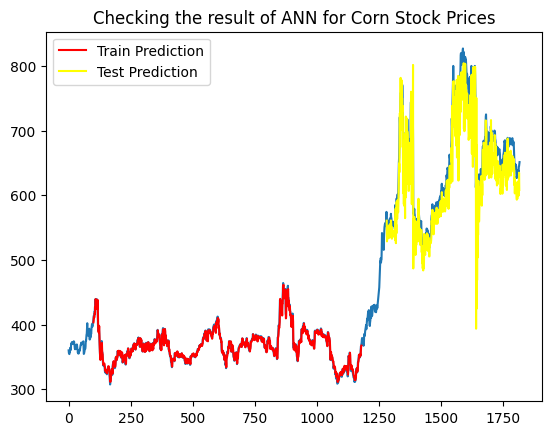

In [175]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color = "red", label = "Train Prediction")
plt.plot(testPredictPlot, color = "yellow", label = "Test Prediction")
plt.legend()
plt.title("Checking the result of ANN for Corn Stock Prices")
plt.show()

In [176]:
len(test_data)

636

In [177]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 295)

In [178]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [179]:
temp_input

[0.6228956228956228,
 0.6166426166426167,
 0.6166426166426167,
 0.6349206349206349,
 0.645021645021645,
 0.6392496392496392,
 0.6416546416546416,
 0.60990860990861,
 0.6079846079846081,
 0.633958633958634,
 0.633958633958634,
 0.6551226551226552,
 0.6839826839826839,
 0.6743626743626743,
 0.6724386724386724,
 0.67003367003367,
 0.6551226551226552,
 0.6632996632996633,
 0.6748436748436748,
 0.710918710918711,
 0.7267917267917268,
 0.7917267917267918,
 0.7691197691197691,
 0.7647907647907648,
 0.8407888407888409,
 0.8710918710918711,
 0.9066859066859068,
 0.948051948051948,
 0.9148629148629148,
 0.8691678691678693,
 0.8658008658008658,
 0.8864838864838864,
 0.8874458874458875,
 0.8556998556998556,
 0.8691678691678693,
 0.8653198653198653,
 0.8662818662818663,
 0.8614718614718615,
 0.8807118807118808,
 0.873015873015873,
 0.8912938912938912,
 0.875901875901876,
 0.861952861952862,
 0.8523328523328524,
 0.847041847041847,
 0.8494468494468495,
 0.8903318903318904,
 0.8547378547378548,
 0.85

In [180]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=294
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.61664262 0.61664262 0.63492063 0.64502165 0.63924964 0.64165464
 0.60990861 0.60798461 0.63395863 0.63395863 0.65512266 0.68398268
 0.67436267 0.67243867 0.67003367 0.65512266 0.66329966 0.67484367
 0.71091871 0.72679173 0.79172679 0.76911977 0.76479076 0.84078884
 0.87109187 0.90668591 0.94805195 0.91486291 0.86916787 0.86580087
 0.88648389 0.88744589 0.85569986 0.86916787 0.86531987 0.86628187
 0.86147186 0.88071188 0.87301587 0.89129389 0.87590188 0.86195286
 0.85233285 0.84704185 0.84944685 0.89033189 0.85473785 0.85618086
 0.88648389 0.87397787 0.86964887 0.8961039  0.90572391 0.90764791
 0.92159692 0.93458393 0.98027898 0.98605099 0.97979798 0.97546898
 0.96248196 0.95189995 0.97162097 0.98701299 0.99326599 1.
 0.97498797 0.99037999 0.96488696 0.95719096 0.94805195 0.93314093
 0.93025493 0.95334295 0.97498797 0.96344396 0.96777297 0.96584897
 0.95238095 0.92833093 0.91341991 0.92496392 0.92303992 0.8961039
 0.8951419  0.91053391 0.9042809  0.86387686 0.83116883 0.8

2 day output [[0.3639157]]
3 day input [0.64502165 0.63924964 0.64165464 0.60990861 0.60798461 0.63395863
 0.63395863 0.65512266 0.68398268 0.67436267 0.67243867 0.67003367
 0.65512266 0.66329966 0.67484367 0.71091871 0.72679173 0.79172679
 0.76911977 0.76479076 0.84078884 0.87109187 0.90668591 0.94805195
 0.91486291 0.86916787 0.86580087 0.88648389 0.88744589 0.85569986
 0.86916787 0.86531987 0.86628187 0.86147186 0.88071188 0.87301587
 0.89129389 0.87590188 0.86195286 0.85233285 0.84704185 0.84944685
 0.89033189 0.85473785 0.85618086 0.88648389 0.87397787 0.86964887
 0.8961039  0.90572391 0.90764791 0.92159692 0.93458393 0.98027898
 0.98605099 0.97979798 0.97546898 0.96248196 0.95189995 0.97162097
 0.98701299 0.99326599 1.         0.97498797 0.99037999 0.96488696
 0.95719096 0.94805195 0.93314093 0.93025493 0.95334295 0.97498797
 0.96344396 0.96777297 0.96584897 0.95238095 0.92833093 0.91341991
 0.92496392 0.92303992 0.8961039  0.8951419  0.91053391 0.9042809
 0.86387686 0.83116883 0

5 day output [[0.15963282]]
6 day input [0.60990861 0.60798461 0.63395863 0.63395863 0.65512266 0.68398268
 0.67436267 0.67243867 0.67003367 0.65512266 0.66329966 0.67484367
 0.71091871 0.72679173 0.79172679 0.76911977 0.76479076 0.84078884
 0.87109187 0.90668591 0.94805195 0.91486291 0.86916787 0.86580087
 0.88648389 0.88744589 0.85569986 0.86916787 0.86531987 0.86628187
 0.86147186 0.88071188 0.87301587 0.89129389 0.87590188 0.86195286
 0.85233285 0.84704185 0.84944685 0.89033189 0.85473785 0.85618086
 0.88648389 0.87397787 0.86964887 0.8961039  0.90572391 0.90764791
 0.92159692 0.93458393 0.98027898 0.98605099 0.97979798 0.97546898
 0.96248196 0.95189995 0.97162097 0.98701299 0.99326599 1.
 0.97498797 0.99037999 0.96488696 0.95719096 0.94805195 0.93314093
 0.93025493 0.95334295 0.97498797 0.96344396 0.96777297 0.96584897
 0.95238095 0.92833093 0.91341991 0.92496392 0.92303992 0.8961039
 0.8951419  0.91053391 0.9042809  0.86387686 0.83116883 0.82491582
 0.84078884 0.88071188 0.898027

8 day output [[0.10223993]]
9 day input [0.63395863 0.65512266 0.68398268 0.67436267 0.67243867 0.67003367
 0.65512266 0.66329966 0.67484367 0.71091871 0.72679173 0.79172679
 0.76911977 0.76479076 0.84078884 0.87109187 0.90668591 0.94805195
 0.91486291 0.86916787 0.86580087 0.88648389 0.88744589 0.85569986
 0.86916787 0.86531987 0.86628187 0.86147186 0.88071188 0.87301587
 0.89129389 0.87590188 0.86195286 0.85233285 0.84704185 0.84944685
 0.89033189 0.85473785 0.85618086 0.88648389 0.87397787 0.86964887
 0.8961039  0.90572391 0.90764791 0.92159692 0.93458393 0.98027898
 0.98605099 0.97979798 0.97546898 0.96248196 0.95189995 0.97162097
 0.98701299 0.99326599 1.         0.97498797 0.99037999 0.96488696
 0.95719096 0.94805195 0.93314093 0.93025493 0.95334295 0.97498797
 0.96344396 0.96777297 0.96584897 0.95238095 0.92833093 0.91341991
 0.92496392 0.92303992 0.8961039  0.8951419  0.91053391 0.9042809
 0.86387686 0.83116883 0.82491582 0.84078884 0.88071188 0.8980279
 0.91486291 0.91149591 0

11 day output [[0.04326047]]
12 day input [0.67436267 0.67243867 0.67003367 0.65512266 0.66329966 0.67484367
 0.71091871 0.72679173 0.79172679 0.76911977 0.76479076 0.84078884
 0.87109187 0.90668591 0.94805195 0.91486291 0.86916787 0.86580087
 0.88648389 0.88744589 0.85569986 0.86916787 0.86531987 0.86628187
 0.86147186 0.88071188 0.87301587 0.89129389 0.87590188 0.86195286
 0.85233285 0.84704185 0.84944685 0.89033189 0.85473785 0.85618086
 0.88648389 0.87397787 0.86964887 0.8961039  0.90572391 0.90764791
 0.92159692 0.93458393 0.98027898 0.98605099 0.97979798 0.97546898
 0.96248196 0.95189995 0.97162097 0.98701299 0.99326599 1.
 0.97498797 0.99037999 0.96488696 0.95719096 0.94805195 0.93314093
 0.93025493 0.95334295 0.97498797 0.96344396 0.96777297 0.96584897
 0.95238095 0.92833093 0.91341991 0.92496392 0.92303992 0.8961039
 0.8951419  0.91053391 0.9042809  0.86387686 0.83116883 0.82491582
 0.84078884 0.88071188 0.8980279  0.91486291 0.91149591 0.91390091
 0.89225589 0.90909091 0.9326

14 day output [[-0.00227897]]
15 day input [ 0.65512266  0.66329966  0.67484367  0.71091871  0.72679173  0.79172679
  0.76911977  0.76479076  0.84078884  0.87109187  0.90668591  0.94805195
  0.91486291  0.86916787  0.86580087  0.88648389  0.88744589  0.85569986
  0.86916787  0.86531987  0.86628187  0.86147186  0.88071188  0.87301587
  0.89129389  0.87590188  0.86195286  0.85233285  0.84704185  0.84944685
  0.89033189  0.85473785  0.85618086  0.88648389  0.87397787  0.86964887
  0.8961039   0.90572391  0.90764791  0.92159692  0.93458393  0.98027898
  0.98605099  0.97979798  0.97546898  0.96248196  0.95189995  0.97162097
  0.98701299  0.99326599  1.          0.97498797  0.99037999  0.96488696
  0.95719096  0.94805195  0.93314093  0.93025493  0.95334295  0.97498797
  0.96344396  0.96777297  0.96584897  0.95238095  0.92833093  0.91341991
  0.92496392  0.92303992  0.8961039   0.8951419   0.91053391  0.9042809
  0.86387686  0.83116883  0.82491582  0.84078884  0.88071188  0.8980279
  0.914862

18 day output [[-0.02717392]]
19 day input [ 0.72679173  0.79172679  0.76911977  0.76479076  0.84078884  0.87109187
  0.90668591  0.94805195  0.91486291  0.86916787  0.86580087  0.88648389
  0.88744589  0.85569986  0.86916787  0.86531987  0.86628187  0.86147186
  0.88071188  0.87301587  0.89129389  0.87590188  0.86195286  0.85233285
  0.84704185  0.84944685  0.89033189  0.85473785  0.85618086  0.88648389
  0.87397787  0.86964887  0.8961039   0.90572391  0.90764791  0.92159692
  0.93458393  0.98027898  0.98605099  0.97979798  0.97546898  0.96248196
  0.95189995  0.97162097  0.98701299  0.99326599  1.          0.97498797
  0.99037999  0.96488696  0.95719096  0.94805195  0.93314093  0.93025493
  0.95334295  0.97498797  0.96344396  0.96777297  0.96584897  0.95238095
  0.92833093  0.91341991  0.92496392  0.92303992  0.8961039   0.8951419
  0.91053391  0.9042809   0.86387686  0.83116883  0.82491582  0.84078884
  0.88071188  0.8980279   0.91486291  0.91149591  0.91390091  0.89225589
  0.90909

21 day output [[-0.02971078]]
22 day input [ 0.76479076  0.84078884  0.87109187  0.90668591  0.94805195  0.91486291
  0.86916787  0.86580087  0.88648389  0.88744589  0.85569986  0.86916787
  0.86531987  0.86628187  0.86147186  0.88071188  0.87301587  0.89129389
  0.87590188  0.86195286  0.85233285  0.84704185  0.84944685  0.89033189
  0.85473785  0.85618086  0.88648389  0.87397787  0.86964887  0.8961039
  0.90572391  0.90764791  0.92159692  0.93458393  0.98027898  0.98605099
  0.97979798  0.97546898  0.96248196  0.95189995  0.97162097  0.98701299
  0.99326599  1.          0.97498797  0.99037999  0.96488696  0.95719096
  0.94805195  0.93314093  0.93025493  0.95334295  0.97498797  0.96344396
  0.96777297  0.96584897  0.95238095  0.92833093  0.91341991  0.92496392
  0.92303992  0.8961039   0.8951419   0.91053391  0.9042809   0.86387686
  0.83116883  0.82491582  0.84078884  0.88071188  0.8980279   0.91486291
  0.91149591  0.91390091  0.89225589  0.90909091  0.93265993  0.94805195
  0.90620

25 day output [[-0.02265865]]
26 day input [ 0.94805195  0.91486291  0.86916787  0.86580087  0.88648389  0.88744589
  0.85569986  0.86916787  0.86531987  0.86628187  0.86147186  0.88071188
  0.87301587  0.89129389  0.87590188  0.86195286  0.85233285  0.84704185
  0.84944685  0.89033189  0.85473785  0.85618086  0.88648389  0.87397787
  0.86964887  0.8961039   0.90572391  0.90764791  0.92159692  0.93458393
  0.98027898  0.98605099  0.97979798  0.97546898  0.96248196  0.95189995
  0.97162097  0.98701299  0.99326599  1.          0.97498797  0.99037999
  0.96488696  0.95719096  0.94805195  0.93314093  0.93025493  0.95334295
  0.97498797  0.96344396  0.96777297  0.96584897  0.95238095  0.92833093
  0.91341991  0.92496392  0.92303992  0.8961039   0.8951419   0.91053391
  0.9042809   0.86387686  0.83116883  0.82491582  0.84078884  0.88071188
  0.8980279   0.91486291  0.91149591  0.91390091  0.89225589  0.90909091
  0.93265993  0.94805195  0.90620491  0.89129389  0.88504089  0.87542088
  0.8446

28 day output [[-0.01279547]]
29 day input [ 0.86580087  0.88648389  0.88744589  0.85569986  0.86916787  0.86531987
  0.86628187  0.86147186  0.88071188  0.87301587  0.89129389  0.87590188
  0.86195286  0.85233285  0.84704185  0.84944685  0.89033189  0.85473785
  0.85618086  0.88648389  0.87397787  0.86964887  0.8961039   0.90572391
  0.90764791  0.92159692  0.93458393  0.98027898  0.98605099  0.97979798
  0.97546898  0.96248196  0.95189995  0.97162097  0.98701299  0.99326599
  1.          0.97498797  0.99037999  0.96488696  0.95719096  0.94805195
  0.93314093  0.93025493  0.95334295  0.97498797  0.96344396  0.96777297
  0.96584897  0.95238095  0.92833093  0.91341991  0.92496392  0.92303992
  0.8961039   0.8951419   0.91053391  0.9042809   0.86387686  0.83116883
  0.82491582  0.84078884  0.88071188  0.8980279   0.91486291  0.91149591
  0.91390091  0.89225589  0.90909091  0.93265993  0.94805195  0.90620491
  0.89129389  0.88504089  0.87542088  0.84463684  0.87638288  0.90957191
  0.9004

In [181]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [182]:
import matplotlib.pyplot as plt

In [183]:
len(df1)

1817

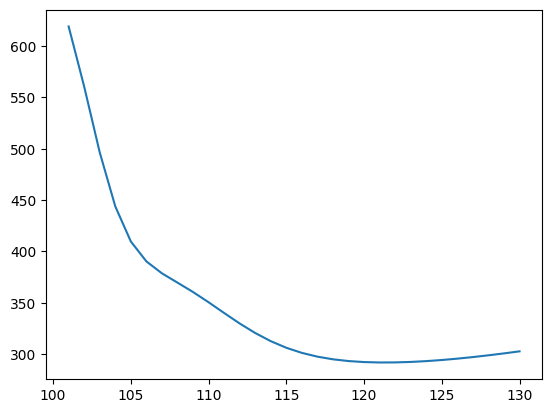

In [184]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [185]:
df1

array([[0.1014911 ],
       [0.09379509],
       [0.09139009],
       ...,
       [0.64983165],
       [0.65704666],
       [0.66185666]])

In [186]:
scaler.inverse_transform(lst_output)

array([[619.11342652],
       [560.48652384],
       [496.39519113],
       [443.80638162],
       [409.6367288 ],
       [390.21915659],
       [378.59321874],
       [369.53413501],
       [360.38920317],
       [350.41625862],
       [339.95373707],
       [329.73462736],
       [320.44016709],
       [312.49878695],
       [306.06550747],
       [301.09144637],
       [297.41308843],
       [294.82501142],
       [293.12635625],
       [292.14397844],
       [291.73964543],
       [291.8078236 ],
       [292.26939125],
       [293.06437399],
       [294.14546997],
       [295.47316675],
       [297.01252719],
       [298.73138293],
       [300.59955267],
       [302.58868532]])

In [187]:
df1 = scaler.inverse_transform(df1[1158:])
lst_output = scaler.inverse_transform(lst_output)

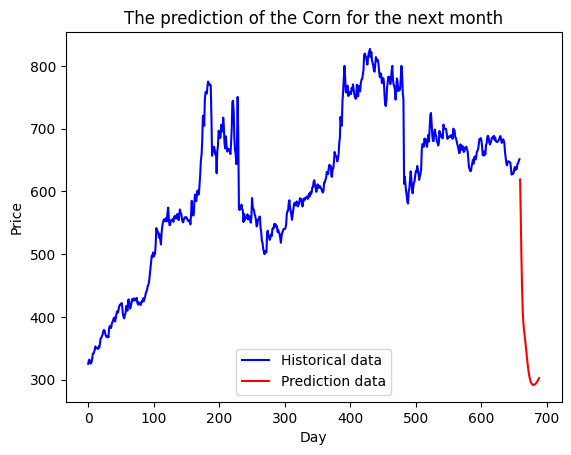

In [188]:
# plot df1
plt.plot(df1, color='blue', label='Historical data')

# plot lst_output starting at the end of df1
plt.plot(range(len(df1), len(df1) + len(lst_output)), lst_output, color='red', label='Prediction data')

# add legend and labels
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.title("The prediction of the Corn for the next month")

# show the plot
plt.show()